<a href="https://colab.research.google.com/github/adrienlasserre/intro_robotics/blob/main/HW1_IR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Robotics 
Instructor: **Voeurn Yong Ann**


**Background**:



*   Ufa state aviation technical university (Bsc. Mechatronics and Robotics, profile: Industrail robotics, 2018), 
*   Innopolis University,(Master of Computer Science, profile: Robotics and computer vision, 2019-2021) 
*   Daegu Gyeongbuk Institute of Science and Technology (DGIST),(PhD of Robotics engineer, profile:legged robotics in medical application, 2021(*Temporery withdrawal*) 


**Research interests**:
*   Control: Nonlinear, Robust, Adaptive, Energy based, Noncolocated and Underactuated, with focus on discrete-time and physically inspired numerical methods.
*   Applied Optimization: Linear, Quadratic, and Nonlinear programming, Dynamical programming, Optimal Control
*   Legged robot/Humanoid robot: Walking, foot step, trajectory planing 


If you face any problems with the course or would like to do research and work on hardware. Feel free to contact me via telegram `@yongann` or email:(y.voeurn@innoplis.univerisity or yongann@armrobotics.io) i


**Notation**

1.   *CLASS EXERCISE*: These exercises we will do together during the practice sessions and discuss the results
2.   *HW EXERCISE*: This is home assignment which I strongly recommend to complete right after the class.

*You have to create a repository of your works then share the link to submit your work at Moodle.*


***Plagiarism** will result in a zero score for the submitted assignment/exam/project.




# LAB1: Reasoning about space


**Goals for today**
During today practice we will:

*   Learn how to use: python function, numpy and other add-in library.
*   Transforms/Rotation representation in 3D
*   Write set of homogeneous tranformation


Excercise 1 : Rotattion matrix around axis z

<p><img alt="mbk" height="250px" src="https://drive.google.com/uc?id=1icWPI4fmjqT6IWTe-OP7AKUT9eK83m7v" align="center" hspace="350px" vspace="0px"></p>


\begin{equation}
\mathbf{H_{x,\alpha ,y}}=
\begin{bmatrix}
1 & 0 & 0 & 0 \cr 0 & \cos\alpha & -\sin\alpha & y
 \cr 0 & \sin\alpha & \cos\alpha & 0
\cr 0 & 0 & 0 & 1 
\end{bmatrix}
\end{equation}




In [ ]:
import numpy as np

def rot_z(theta):
    rz = np.array([[np.cos(theta), -np.sin(theta), 0], [np.sin(theta), np.cos(theta), 0], [0, 0, 1]]) 
    return rz

In [ ]:
r1_0= rot_z(90)

print(r1_0)

[[-0.44807362 -0.89399666  0.        ]
 [ 0.89399666 -0.44807362  0.        ]
 [ 0.          0.          1.        ]]


**Class Excercise**: 

 

1.   Find value of rotation around z for 30 degree.




In [ ]:
# Your code here
import numpy as np

def rot_z(theta):
    rz = np.array([[np.cos(theta), -np.sin(theta), 0], [np.sin(theta), np.cos(theta), 0], [0, 0, 1]]) 
    return rz

r2=rot_z(np.pi/6)

print(r2)

[[ 0.8660254 -0.5        0.       ]
 [ 0.5        0.8660254  0.       ]
 [ 0.         0.         1.       ]]


2.   Find value of x by first rotate around x for 90 degree and translation along y for 10 m 

In [ ]:
import numpy as np

def rot_trans(theta, y):
    rrt = np.array([[1, 0, 0, 0], [0, np.cos(theta), -np.sin(theta), y], [0, np.sin(theta), np.cos(theta), 0], [0, 0, 0, 1]]) 
    return rrt

rx=np.array([5, 7, 2, 1]) #random point taken to try the multiplication of matrices
r3=rot_trans(np.pi/2, 10)
print("rot + trans matrix by pi/2 and 10m")
print(r3) #gives the rot+translation matrix
rxn=np.dot(r3, rx)
print("test vector modified")
print(rxn)

rot + trans matrix by pi/2 and 10m
[[ 1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00]
 [ 0.000000e+00  6.123234e-17 -1.000000e+00  1.000000e+01]
 [ 0.000000e+00  1.000000e+00  6.123234e-17  0.000000e+00]
 [ 0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00]]
test vector modified
[5. 8. 7. 1.]


**Class Excercise** : 

There is a robot work station as shown in the picture below. 

1. define tranformation of absolute task (Task Frame $RF_T$ to World Frame  $RF_W$)

2. Find robot tool tranformation (Base frame $RF_B$ to End-effector frame $RF_E$)

<p><img alt="mbk" height="250px" src="https://drive.google.com/uc?id=1hUdzOU9yNPuoN_yXFf-tKQAjRldny2rW" align="center" hspace="350px" vspace="0px"></p>

$T_E^B = (T_B^W)^-1 T_T^W (T_T^E)^-1$

In [ ]:
import numpy as np
#simple translation by an array x, y ,z for a frame to another
x0=0 #coordinates of origin system 0,0,0
y0=0
z0=0

def trans(x):
  H1=np.array([[1, 0, 0, x[0]], [0, 1, 0, x[1]], [0, 0, 1, x[2]], [0, 0, 0, 1]])
  return H1

RFW=np.array([x0, y0, z0, 1])
RFT=np.dot(trans([10, 15, 5]), RFW) #random values for translations

print(RFT)

[10 15  5  1]


**Class Excercise** : 

Homogeneous transformation matrix and SO(3) matrices 



<p><img alt="mbk" height="250px" src="https://images.squarespace-cdn.com/content/v1/523c5c56e4b0abc2df5e163e/1402307705392-63DLV0PH4GR9E4EQELAU/image-asset.png?format=1000w" align="center" hspace="350px" vspace="0px"></p>






http://paulfurgale.info/news/2014/6/9/representing-robot-pose-the-good-the-bad-and-the-ugly

**spatialmath-python**

https://github.com/petercorke/spatialmath-python




In [ ]:
!git clone https://github.com/petercorke/spatialmath-python.git
# !cd spatialmath-python
# !pip install -e .

Cloning into 'spatialmath-python'...
remote: Enumerating objects: 7682, done.
remote: Counting objects: 100% (2765/2765), done.
remote: Compressing objects: 100% (943/943), done.
remote: Total 7682 (delta 2246), reused 2283 (delta 1811), pack-reused 4917
Receiving objects: 100% (7682/7682), 17.89 MiB | 13.27 MiB/s, done.
Resolving deltas: 100% (5938/5938), done.


In [ ]:
!pip install /content/spatialmath-python

Processing ./spatialmath-python
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for spatialmath-python: filename=spatialmath_python-0.12.0-py3-none-any.whl size=178301 sha256=bd186ff8ce77384da73882322ffd45c226139e5628ae34af2217905bf39c26aa
  Stored in directory: /root/.cache/pip/wheels/8b/8a/c9/5d5696150da6a20392c3a728f9de76517f6f7d7c87c418d586
  Created wheel for ansitable: filename=ansitable-0.9.6-py3-none-any.whl size=12621 sha256=278accb0704aa05a83a4db1395d63becf99cd0d88bc2b2ce54c746ad9374983a
  Stored in directory: /root/.cache/pip/wheels/57/a4/a9/84ed983596f261a978c880aba60eba145e76aa5a59e455f189
  Created wheel for colore

/usr/local/lib/python3.7/dist-packages/spatialmath/base/graphics.py:1192: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes(ax)


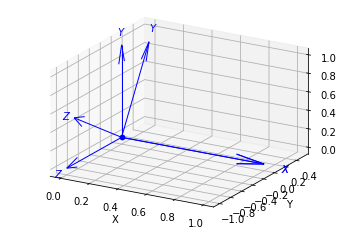

In [ ]:
from spatialmath import *

R1 = SO3.Rx(np.pi/2)
R2 = SO3.Rx(np.pi/3)

R1.plot()
R2.plot()

/usr/local/lib/python3.7/dist-packages/spatialmath/base/graphics.py:1192: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes(ax)


   1         0         0         1         
   0         0.866    -0.5       2         
   0         0.5       0.866     3         
   0         0         0         1         


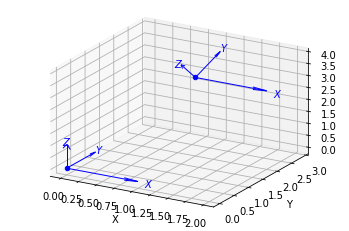

In [ ]:

T1 = SE3(0,0,0)
T = T1*SE3(1,2,3) * SE3.Rx(30, 'deg')

T1.plot()
T.plot()

T

**HW Excercise 1** (20 pts): 

Consider the wedge-shaped object in figure below. Obtain the transformation matrix **H** that should be applied to take the object from the original (left) to its final location (right).

<p><img alt="mbk" height="250px" src="https://drive.google.com/uc?id=1UjWpoNM8A4OOqcizoTevj_806BSPzIPt" align="center" hspace="350px" vspace="0px"></p>

/usr/local/lib/python3.7/dist-packages/spatialmath/base/graphics.py:1192: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes(ax)


   0        -1         0         1.5       
   0         0         1         1         
  -1         0         0         0         
   0         0         0         1         


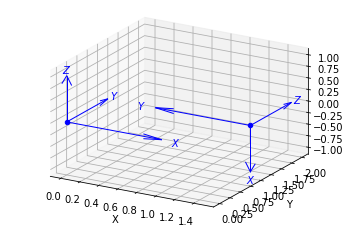

In [ ]:
from spatialmath import *

#for the translation is it 1 in y axis or z axis?

import numpy as np

T1=SE3(0,0,0)
T2=T1*SE3(1.5, 1, 0)
R1=T2*SE3.Ry(np.pi/2)
R2 = R1*SE3.Rx(-np.pi/2)

T1.plot()
R2.plot()

R2


**HW Excercise 2** (20 pts): 

Create a function for calculating Denavit-Hartenberg convention


In [ ]:
from spatialmath import *
import numpy as np

def hartenberg(r_n, d_n, theta_n, alpha_n):
  H=np.array([[np.cos(theta_n), -np.sin(theta_n)*np.cos(alpha_n), np.sin(theta_n)*np.sin(alpha_n), r_n*np.cos(theta_n)], [np.sin(theta_n), np.cos(theta_n)*np.cos(alpha_n), -np.cos(theta_n)*np.sin(alpha_n), r_n*np.sin(theta_n)], [0, np.sin(alpha_n), np.cos(alpha_n), d_n], [0, 0, 0, 1]])
  return H

X=np.array([1, 2, 3, 1]) #test vector
H1= hartenberg(5, 10, np.pi/3, np.pi/6) #random values for r_n, d_n, and alpha and theta

print(H1)

Y=np.dot(H1, X) #vector modified
print(

  "Vector modified by Denavit-Hartenberg matrix:"  
)

print(Y)

[[ 0.5        -0.75        0.4330127   2.5       ]
 [ 0.8660254   0.4330127  -0.25        4.33012702]
 [ 0.          0.5         0.8660254  10.        ]
 [ 0.          0.          0.          1.        ]]
Vector modified by Denavit-Hartenberg matrix:
[ 2.79903811  5.31217783 13.59807621  1.        ]


**HW Excercise 3** (10 pts) Convert *Euler Angles* (0, $\pi$/2, 0) to *Homogeneous Transformation* Matrix

In [ ]:
from spatialmath import *
import numpy as np

#Here is a version of what we can do, using the lectures' notes

def rotz(phi):
  Rz=np.array([[np.cos(phi), -np.sin(phi), 0], [np.sin(phi), np.cos(phi), 0], [0, 0, 1]])
  return Rz

def roty(x):
  Ry=np.array([[np.cos(x), 0, np.sin(x)], [0, 1, 0], [-np.sin(x), 0, np.cos(x)]])
  return Ry

R1=rotz(0)
R2=roty(np.pi/2)
R3=rotz(0)
R=np.dot(R1, R2, R3)

print("First method")
print(R)

#We could also do it just this way

Rr=SO3.Ry(np.pi/2)
print("Second method")
print(Rr)


First method
[[ 6.123234e-17  0.000000e+00  1.000000e+00]
 [ 0.000000e+00  1.000000e+00  0.000000e+00]
 [-1.000000e+00  0.000000e+00  6.123234e-17]]
Second method
   0         0         1         
   0         1         0         
  -1         0         0         



**HW Excercise 4** (50 pts) Given the fact that any rotation matrix $R(θ) ∈ SO(3)$ is orthogonal i.e $R(θ)^TR(θ) = I$, prove the following:


1.   $R^T(θ) = R^{-1}(θ)$ (10 pts)
2.   $det\{R(θ)\} = 1$ (10 pts)
3.   $\|a\| = \|b\| ; \forall a, b : a = R(θ)b$ (15 pts)
3.   $\frac{d}{dθ}R(θ) = SR(θ)$, where $S + S^T = 0 $(15 pts)

Using results from above, find(20 pts):


*   $S_a$ such $a\times b = S_ab$ (bonus problem)
*   \* $\dot a$ in terms of $S, R(θ),\dot{\theta}$ if $a = R(θ)b ; \dot B = 0$
= 0 (bonus problem)




**Exercise 4 HW - Answer sheet**
1. $R(θ)^T R(θ) = I $ 
So with that we know that we can apply the inverse matrix on both sides such as:
$R(θ)^T R(θ) R(θ)^{-1}= I R(θ)^{-1}$
Which is equal to
$R(θ)^T=R(θ)^{-1}$
2. The determinant of any rotation matrix is equal to $det(R(θ))=cos(θ)^2 + sin(θ)^2 = 1$ 
It can be shown by calculating dets for Rotation by x, y and z axis.
3. As we prooved $det(R(θ)) = 1$ We can show that:
$∥R(θ)b∥≤∥R(θ)∥∥b∥=∥b∥$
and then $∥R(θ)b∥≥∥b∥$ using $R(θ)^T=R(θ)^{-1}$ 

So, $||a||=||b||$, if $a=R(θ)b$

4. $\frac{d}{dθ}R(θ) = SR(θ)$, where $S + S^T = 0 $

For that, we will first go by saying
$R R^T=I$ for rotation matrices
then $R(θ)R(θ)^T=I$
if we take the derivative it will give us:
$\frac{d}{dθ}R(θ)R(θ)^T +R(θ)\frac{d}{dθ}R(θ)^T = \frac{d}{dθ} I = 0$
Then, we get with $(AB)^T = B^T A^T$ that:
$\frac{d}{dθ}R(θ)R(θ)^T + (\frac{d}{dθ}R(θ)R(θ)^T)^T = 0$
We can say it is the skew symmetric matrix S
and $S + S^T = 0$
then $S =\frac{d}{dθ}R(θ)R(θ)^T$
and so we get back to what we wanted to show:
$SR(θ)=\frac{d}{dθ}R(θ)R(θ)^T R(θ) = \frac{d}{dθ}R(θ) I = \frac{d}{dθ}R(θ)$

5. $S_a$ such $a\times b = S_ab$ (bonus problem)

take $a=(a,b,c)$ and $b=(x,y,z)$
Then:
$S(a)=((0, -c, b), (c, 0, -a), (-b, a, 0))$
and then multiplying
$S(a)b=(-cy+bz, cx-az, -bx+ay)$
and using cross product properties we get the same
$a × b = (-cy+bz, cx-az, -bx+ay)$

So, $S_a$ such $a\times b = S_ab$
